# Exploring different Legend options in Magics

**Mlegend** controls how legend looks on our maps. Here we can set things like display type, position, width, height, title and many more things.  
List of all **mlegend** parameters you can find [in Magics documentation](https://confluence.ecmwf.int/display/MAGP/Legend "Legend parameters")


### Import Magics and define non Lengend paramters

For start let's import Magics and define some **none legend** parameters. We will try not to change these much in the rest of the notebook.

In [7]:
import Magics.macro as magics
import xarray as xr


projection = magics.mmap(
    subpage_map_library_area = "on",
    subpage_map_area_name = "europe",
    page_id_line = 'off'
)

coast = magics.mcoast()

ecmwf_cont = magics.mcont(
    contour_automatic_setting = "ecmwf",
    legend = "on")

# Different meteorological parameters we will plot in this notebook
temperature   = magics.mgrib(grib_input_file_name = "data/t850.grib")
geopotential  = magics.mgrib(grib_input_file_name = "data/z500.grib")
precipitation = magics.mgrib(grib_input_file_name = "data/total_precipitation.grib")
sat_ir        = magics.mgrib(grib_input_file_name = "data/ssd.grib")

### Default legend

As with everything in Magics, default is something you can start with.

Default display type is disjoint. Default text colour is blue, and position is horizontal on top.

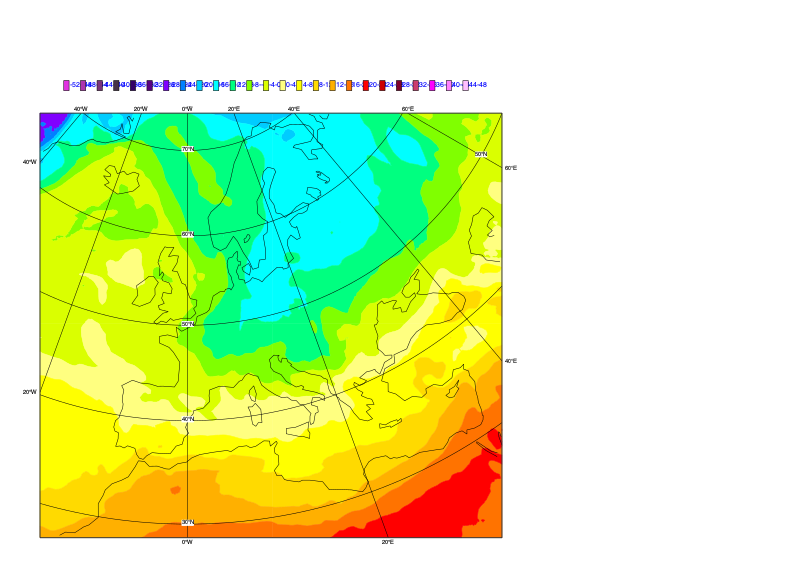

In [8]:
legend = magics.mlegend()

magics.plot(projection, temperature, ecmwf_cont, coast, legend)

### Example 1: Vertical legend with user defined title

Legend default position is at the top, but another automatic position is on the right side.   
Display type can be disjoint, histogram and continuous.   

If we have many values shaded, we can choose to show only some values by setting **legend_label_frequency**.  

**legend_text_font_size** controls the size of font in Legend entries  
**legend_title_font_size** controls the size of font in Legend title text. By default it is the same as size of numbers

In [63]:
from ipywidgets import interact,Layout
import ipywidgets as widgets
from IPython.display import clear_output
style = { 'description_width' : '200px'}
layout = Layout(width='600px')
largelayout = Layout(width='900px')

In [64]:

@interact(legend_display_type = widgets.ToggleButtons( options=['continuous', 'disjoint'],
                            description='legend_display_type',
                            disabled=False, style = style, layout = layout),
          legend_text_font_size = widgets.FloatSlider(min=0.1, max=2., step=0.1, value=0.45, continuous_update=False, style = style, layout = layout),
          legend_title_font_size = widgets.FloatSlider(min=-1, max=2., step=0.1, value= -1, continuous_update=False, style = style, layout = layout),)
def legend_example(legend_display_type = "continuous", legend_text_font_size = 0.45, legend_title_font_size = -1):
    legend = magics.mlegend(
        legend_display_type       = legend_display_type,
        legend_automatic_position = "right",
        legend_title              = "on",
        legend_title_text         = "Temperature at 850 hPa",
        legend_title_font_size    = legend_title_font_size ,
        legend_text_font_size     = legend_text_font_size,
        legend_text_colour        = "#2b619e",
        legend_label_frequency    = 2) 
    clear_output(wait=True)
    return magics.plot(projection, temperature, ecmwf_cont, coast, legend)    

interactive(children=(ToggleButtons(description='legend_display_type', layout=Layout(width='600px'), options=(…

### Example 2:
We can have full control over the size and position of the legend using legend box position and size parameters.  
Parameters we're using for this are:  
- legend_box_x_position
- legend_box_y_position
- legend_box_x_length and
- legend_box_y_length

**legend_title_position_ratio** lets us set percentige of space for the title. Default is 25(%).

In [61]:
@interact(legend_display_type = widgets.ToggleButtons( options=['continuous', 'disjoint'],
                            style = style, layout = layout),
          legend_border = widgets.ToggleButtons( options=['on', 'off'], value='off', style = style, layout = layout),
          legend_box_y_height = widgets.FloatSlider(min=1., max=5., value=2., continuous_update=False, 
                                                    style = style, layout = layout),
          legend_title_position_ratio = widgets.IntSlider(min=10, max=100, value=50, continuous_update=False, style = style, layout = layout),
          legend_text_font_size = widgets.FloatSlider(min=0.1, max=2., step=0.1, value=0.45, continuous_update=False, style = style, layout = layout),
          legend_label_frequency = widgets.IntSlider(min=1, max=5, value=2, continuous_update=False, style = style, layout = layout),
         )
def legend_example(legend_display_type = "continuous", 
                   legend_border = 'off',
                   legend_box_y_height = 2.,
                   legend_title_position_ratio = 50, 
                   legend_text_font_size = 0.5,
                   legend_label_frequency =2 ):
    legend = magics.mlegend(
        legend_display_type         = legend_display_type,
        legend_border               = legend_border,
        legend_box_mode             = "positional",
        legend_box_x_position       = 0.5,
        legend_box_y_position       = 17.00,
        legend_box_x_length         = 19.00,
        legend_box_y_length         = legend_box_y_height,
        legend_title_position_ratio = legend_title_position_ratio,
        legend_title                = "on",
        legend_title_text           = "Temperature at 850 hPa",
        legend_text_font_size       = legend_text_font_size,
        legend_text_colour          = "#2b619e",
        legend_label_frequency      = legend_label_frequency) 
    clear_output(wait=True)
    return magics.plot(projection, temperature, ecmwf_cont, coast, legend)

interactive(children=(ToggleButtons(description='legend_display_type', layout=Layout(width='600px'), options=(…

### Example 3: User defined minimum and maximum

If we don't want to show the actual minimum and maximum of the field, or list of levels, we can write something special only on first and last point at legend using **mlegend**'s maximum and minimum parameters.

Also, for cases when we have many many levels we can remove the lines between colours on legend setting **legend_entry_border** to **off**.  
We can controll the position of the title using parameter **legend_title_position**.   
**legend_entry_text_width** controls the percentige for the entry text in legend (numbers).

In [65]:
@interact(        
    legend_entry_text_width  = widgets.IntSlider(min=10, max=100, value=60, continuous_update=False, 
                                                 style = style, layout = layout),
    legend_entry_border = widgets.ToggleButtons( options=['on', 'off'], value='on', style = style, layout = layout),
    legend_title = widgets.ToggleButtons( options=['on', 'off'], value='off', style = style, layout = layout),
    legend_title_position =  widgets.ToggleButtons( options=['top', 'bottom', 'left', 'right'], value='top', style = style, layout = largelayout),
)
def legend_exemple(legend_entry_text_width = 60, legend_entry_border = "on", legend_title='off', legend_title_position = "top"):
    legend = magics.mlegend(
        legend_display_type       = "continuous",
        legend_automatic_position = "right",
        legend_title              = legend_title,
        legend_entry_text_width   = legend_entry_text_width,
        legend_title_text         = "Brightness temperature",
        legend_text_font_size     = "0.45",
        legend_text_colour        = "#2b619e",
        legend_label_frequency    = 4,
        legend_title_position     = legend_title_position,
        legend_entry_border       = legend_entry_border,
        legend_user_minimum       = "on",
        legend_user_minimum_text  = "< -100",
        legend_user_maximum       = "on",
        legend_user_maximum_text  = "> 50")

    clear_output(wait=True)
    return magics.plot(projection, sat_ir, ecmwf_cont, coast, legend)  

interactive(children=(IntSlider(value=60, continuous_update=False, description='legend_entry_text_width', layo…

### Example 4: Positional disjoint legend with user defined labels

Lables on the legend can be numbers as well as user defined text (and both).
If we have too much text we might want to separate legend in columns, instead putting all in one row.

Let's make highly customized positional, disjoint legend, with title and text labels.

In [66]:
@interact(
    legend_column_count  = widgets.IntSlider(min=1, max=10, value=3, continuous_update=False, 
                                                 style = style, layout = layout),
    legend_text_composition = widgets.ToggleButtons( options=['user_text_only', 'automatic_text_only', 'both'], 
                                                    value='user_text_only', style = style, layout = largelayout),

)
def _legend_example(legend_column_count=3, legend_text_composition='user_text_only'):
    t850_contour = magics.mcont(
        legend                       = "on",
        contour_shade                = "on",
        contour_hilo                 = "off",
        contour                      = "off",
        contour_label                = "off",
        contour_shade_method         = "area_fill",     
        contour_shade_max_level      = 48.,
        contour_shade_min_level      = -48.,     
        contour_level_selection_type = "level_list",
        contour_level_list           = [-48.0,-10.0,0.0,10.0,20.0,30.0, 48.0],
        contour_shade_colour_method  = "list",
        contour_shade_colour_list    = [ "blue_purple",
                                         "greenish_blue",
                                         "blue_green",
                                         "yellow_green",
                                         "yellow",
                                         "orange"])

    legend = magics.mlegend(
        legend_box_mode         = "positional",
        legend_box_x_position   = 1.00,
        legend_box_y_position   = 17.00,
        legend_box_x_length     = 20.00,
        legend_box_y_length     = 2.00,
        legend_column_count     = legend_column_count,    
        legend_display_type     = "disjoint",
        legend_text_composition = legend_text_composition,
        legend_title            = "on",
        legend_user_lines       = ["extremely cold",
                                   "very cold",
                                   "cold",
                                   "temperate",
                                   "hot",
                                   "very hot"],
        legend_text_font_size   = "0.55",
        legend_text_colour      = "#2b619e",
        legend_title_text       = "Temperature at 850 hPa")
    clear_output(wait=True)
    return magics.plot(projection, temperature, t850_contour, coast, legend)

interactive(children=(IntSlider(value=3, continuous_update=False, description='legend_column_count', layout=La…

### Example 5:  Gradients' waypoints labels on Legend

In cases we are using gradients as shading colour method, and have a large number of colours, we may want to label only gradients' waypoints. The way to do it is by supplying list of values for labels. 

A little tip for the case we don't want any lines on legend. Setting **legend_entry_border** to "off" will remove lines between the colours, but the line around the legend is still there as we can see in previous example. The trick to get rid of that line too is to set **legend_entry_border** to "on" and **legend_entry_border_colour** to "none".


In [79]:
@interact(
    legend_entry_border = widgets.ToggleButtons( options=['on', 'off'], value='on', style = style, layout = layout),
    legend_values_list = widgets.Text(value='-30.,-20.,0.,20.,30.', continuous_update=False, style = style, layout = layout )
)
def legend_example(legend_entry_border='on', legend_values_list = '-30.,-20.,0.,20.,30.'):
    t_cont = magics.mcont(
        legend                            = "on",
        contour                           = "off",
        contour_level_selection_type      = "level_list",
        contour_level_list                = [-30.,-20.,0.,20.,30.],
        contour_gradients_step_list       = [10,20,20,10],
        contour_label                     = "off",
        contour_shade                     = "on",
        contour_shade_colour_method       = "gradients",
        contour_gradients_technique       = "rgb",
        contour_shade_method              = "area_fill",
        contour_gradients_colour_list     = ["RGB(0.01961,0.251,0.4157)","greenish_blue","white",
                                             "orangish_red","RGB(0.3756,0.06648,0.05582)"],
        contour_gradients_waypoint_method = "ignore")

    ll = legend_values_list.split(',')
    levels = []
    for l in ll:
        levels.append(float(l))
    
    legend = magics.mlegend(
        legend_display_type        = "continuous",
        legend_box_mode            = "automatic",
        legend_text_composition    = "user_text_only",
        legend_values_list         = levels,
        legend_text_font_size      = "0.45",
        legend_text_colour         = "#2b619e",    
        legend_entry_border        = legend_entry_border,
        legend_entry_border_colour = "charcoal")  
    clear_output(wait=True)
    return magics.plot(projection, temperature, t_cont, coast, legend) 

interactive(children=(ToggleButtons(description='legend_entry_border', layout=Layout(width='600px'), options=(…

### Example 6: Positional and histogram legend

Legend can be in a form of histogram too.

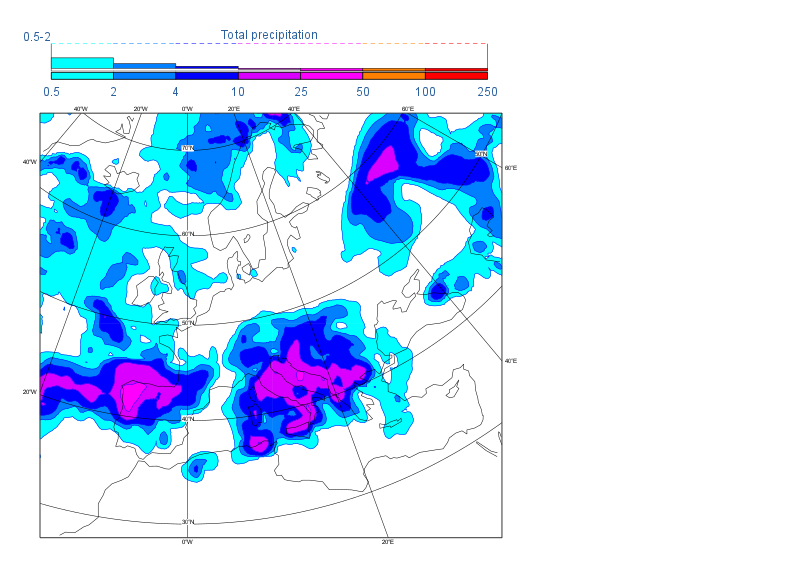

In [8]:
legend = magics.mlegend(
    legend_display_type   = "histogram",
    legend_box_mode       = "positional",
    legend_box_x_position = 1.00,
    legend_box_y_position = 17.00,
    legend_box_x_length   = 18.00,
    legend_box_y_length   = 3.00,
    legend_title          = "on",
    legend_title_text     = "Total precipitation",
    legend_text_font_size = "0.5",
    legend_text_colour    = "#2b619e")
    
magics.plot(projection, precipitation, ecmwf_cont, coast, legend)